# Problem_Statement(glass.csv)

In [1]:
#Importing nessasary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [3]:
#Importing datasets
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#Split data into independent and dependent varibles
X = df.drop('Type',axis = 1)
y = df['Type']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Search for the optimal k value
k_values = list(range(1,25))  
# Adjust the range as needed
cv_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

In [8]:
# k_scores=grid.best_score_
pd.Series(cv_scores).sort_values(ascending=False)

1     0.672515
0     0.666667
6     0.666667
3     0.660819
2     0.649123
7     0.649123
5     0.643275
4     0.631579
8     0.625731
9     0.625731
10    0.619883
11    0.602339
12    0.584795
15    0.578947
16    0.578947
18    0.578947
13    0.573099
17    0.573099
14    0.567251
19    0.567251
23    0.561404
21    0.555556
22    0.555556
20    0.549708
dtype: float64

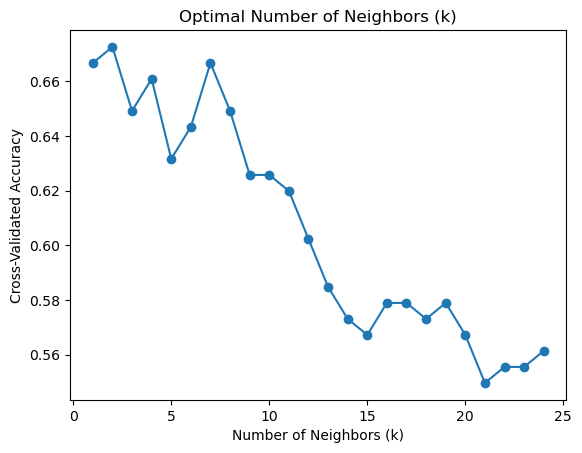

In [9]:
# Plot the accuracy scores for different k values
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal Number of Neighbors (k)')
plt.show()

In [10]:
# Find the optimal k value
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is: {optimal_k}")

The optimal number of neighbors is: 2


# Problem_Statement(Zoo.csv)

In [12]:
#Import dataset
dg = pd.read_csv('Zoo.csv')
dg

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [13]:
#Obtain dependent and independent variables
x = dg.drop(columns = ['type','animal name'],axis = 1)
y = dg['type']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Search for the optimal k value
k_values = list(range(1,25))  
# Adjust the range as needed
cv_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

In [17]:
# k_scores=grid.best_score_
pd.Series(cv_scores).sort_values(ascending=False)

2     0.946302
0     0.933144
3     0.906472
1     0.892959
4     0.879445
5     0.853129
6     0.853129
7     0.853129
8     0.853129
9     0.826102
10    0.799431
11    0.799431
13    0.786273
12    0.786273
14    0.759957
15    0.746444
16    0.732930
17    0.719772
18    0.680299
19    0.653272
20    0.613442
21    0.586415
22    0.572902
23    0.545875
dtype: float64

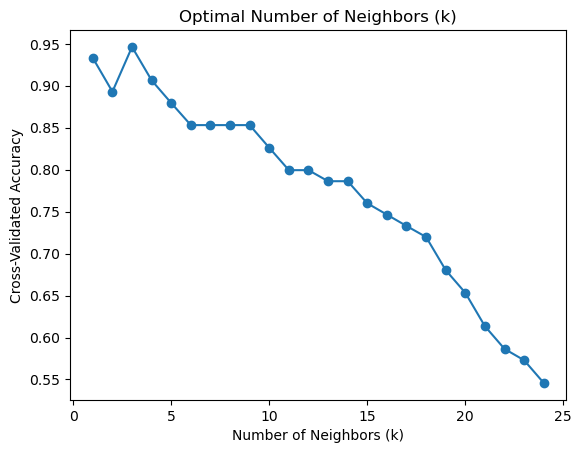

In [18]:
# Plot the accuracy scores for different k values
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal Number of Neighbors (k)')
plt.show()

In [19]:
# Find the optimal k value
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is: {optimal_k}")

The optimal number of neighbors is: 3
